In [3]:
import json
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap

In [4]:
def analyse(dict_coordo_xyz_labels_r):
    global dict_metriques
    dict_metriques = {'angle_scap_vert' : [], 'angle_scap_prof': [], 'diff_dg': [], 'dejettement': [], 'scoliosis': []}
    
    for im, coordo in dict_coordo_xyz_labels_r.items():
        scap_y = np.degrees(np.arctan((coordo['ScD'][1] - coordo['ScG'][1])/(coordo['ScD'][0] - coordo['ScG'][0])))
        dict_metriques['angle_scap_vert'].append(scap_y)
        scap_z = np.degrees(np.arctan((coordo['ScG'][2] - coordo['ScD'][2])/(coordo['ScD'][0] - coordo['ScG'][0]))) #ajouter avec z
        dict_metriques['angle_scap_prof'].append(scap_z)

        # calcul distance horizontale entre marqueurs D/G et l'axe du rachis (x=ay+b)
        if 'Linf' in coordo.keys():
            a = (coordo['Linf'][0]-coordo['C7'][0])/(coordo['Linf'][1]-coordo['C7'][1])
        elif 'Tinf' in coordo.keys():
            a = (coordo['Tinf'][0]-coordo['C7'][0])/(coordo['Tinf'][1]-coordo['C7'][1])
        b = coordo['C7'][0] - a*coordo['C7'][1]
        x1 = coordo['ScG'][0]
        x2 = (a*coordo['ScG'][1])+b
        d1 = abs(x1 - x2) #distance entre G et l'axe de la colonne
        x3 = coordo['ScD'][0]
        x4 = a*coordo['ScD'][1]+b
        d2 = abs(x3 - x4) #distance entre D et l'axe de la colonne
        diff_d1d2 = abs(d1 - d2)
        dict_metriques['diff_dg'].append(diff_d1d2)

        dejet = (coordo['ID'][0]+coordo['IG'][0])/2 - coordo['C7'][0]
        dict_metriques['dejettement'].append(dejet)

        a = np.sqrt((coordo['Tsup'][0]-coordo['Tap'][0])**2+(coordo['Tsup'][1]-coordo['Tap'][1])**2)
        b = np.sqrt((coordo['Tap'][0]-coordo['Tinf'][0])**2+(coordo['Tap'][1]-coordo['Tinf'][1])**2)
        c = np.sqrt((coordo['Tsup'][0]-coordo['Tinf'][0])**2+(coordo['Tsup'][1]-coordo['Tinf'][1])**2)
        scoliosis_angle = 180 - np.degrees(np.arccos((a**2+b**2-c**2)/(2*a*b)))
        dict_metriques['scoliosis'].append(scoliosis_angle)

    return dict_metriques

In [16]:
def graph_analyze(dict_metriques, nb_im, corrections):
    # Graphiques des metriques calculées selon l'image
    xaxis = range(1, nb_im+1)
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2)

    ax1.plot(xaxis, dict_metriques['angle_scap_vert'], label='Hauteur')
    ax1.plot(xaxis, dict_metriques['angle_scap_prof'], label='Profondeur')
    ax1.legend(fontsize=7)
    ax1.set_title("Angles entre les scapulas", fontsize=9)
    ax1.set_ylabel('Angle (degrés)', fontsize=9)

    ax2.plot(xaxis, dict_metriques['diff_dg'])
    ax2.set_title("|Distance rachis-G - Distance rachis-D|", fontsize=9)
    ax2.set_ylabel('Distance (mm)', fontsize=9)
    
    ax3.set_title('Déjettement (> 0 = gauche | < 0 = droit)', fontsize=9)
    ax3.set_ylabel('Distance (mm)', fontsize=9)
    ax4.set_title('Angle de scoliose', fontsize=9)
    ax4.set_ylabel('180 - Angle (degrés)', fontsize=9)

    ax3.plot(xaxis, dict_metriques['dejettement'])
    ax3.set_xlabel("Numéro de l'image", fontsize=9)
    
    ax4.plot(xaxis, dict_metriques['scoliosis'])
    ax4.set_xlabel("Numéro de l'image", fontsize=9)

    for dict_coordo_xyz_labels_r, col in zip(corrections, ['tab:red', 'tab:green', 'k', 'tab:purple', 'c', 'tab:gray', 'tab:pink']):
        moy_metriques = {}
        dict_metriques = analyse(dict_coordo_xyz_labels_r)
        for metrique, valeurs in dict_metriques.items():
            moy_metriques.update({metrique : np.mean(valeurs)})
        ax1.axhline(moy_metriques['angle_scap_vert'], color=col)
        ax1.axhline(moy_metriques['angle_scap_prof'], color=col)
        ax2.axhline(moy_metriques['diff_dg'], color=col)
        ax3.axhline(moy_metriques['dejettement'], color=col)
        ax4.axhline(moy_metriques['scoliosis'], color=col)

    
    plt.tight_layout()

{'angle_scap_vert': -2.5737037904086915, 'angle_scap_prof': -0.7730837288392072, 'diff_dg': 0.8459264882273402, 'dejettement': 25.500366058540198, 'scoliosis': 0.5847235564100515}
{'angle_scap_vert': -5.983608717273518, 'angle_scap_prof': -1.4167634344413007, 'diff_dg': 2.189056560141053, 'dejettement': 1.2152842953384713, 'scoliosis': 1.2305649561136902}
{'angle_scap_vert': -9.355443340471851, 'angle_scap_prof': -0.23855877496526684, 'diff_dg': 16.11223964935012, 'dejettement': -7.144671309987987, 'scoliosis': 2.0966751898413776}


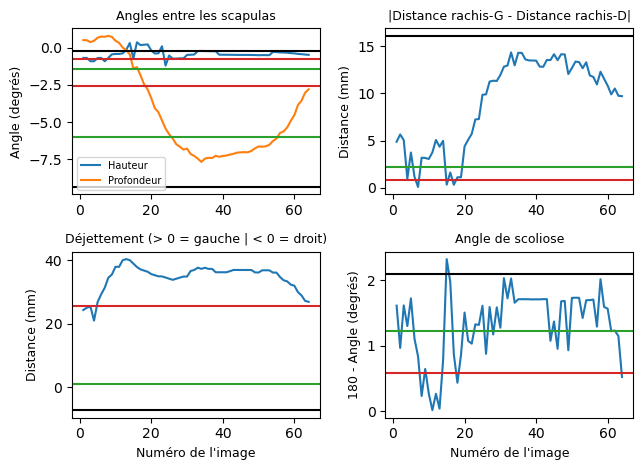

In [19]:
i = 19

try:
    auto2 = json.load(open(f'D:/StageE23/Data/Ete_2023/Participant{i}/autocorrection/Prise01/Positions/positions_xyzr.json'))
    cor2 = json.load(open(f'D:/StageE23/Data/Ete_2023/Participant{i}/Corrected/Prise02/Positions/positions_xyzr.json'))
    min2 = json.load(open(f'D:/StageE23/Data/Ete_2023/Participant{i}/Minimum/Prise02/Positions/positions_xyzr.json'))
    max1 = json.load(open(f'D:/StageE23/Data/Ete_2023/Participant{i}/Maximum/Prise02/Positions/positions_xyzr.json'))
except FileNotFoundError:
    pass

for dict_coordo_xyz_labels_r in [cor2, min2, max1]:
    moy_metriques = {}
    dict_metriques = analyse(dict_coordo_xyz_labels_r)
    for metrique, valeurs in dict_metriques.items():
        moy_metriques.update({metrique : np.mean(valeurs)})

    print(moy_metriques)

dict_metriques = analyse(auto2)
graph_analyze(dict_metriques, len(dict_metriques['scoliosis']), [cor2, min2, max1])
    